# 1. 재귀 알고리즘

: 자기자신을 포함하고 다시 자기 자신을 사용하여 정의되는 경우

---


## (1) 예

### * 자연수의 정의
    - 1은 자연수이다.
    - 어떤 자연수의 바로 다음 수도 자연수이다.
    
### * 팩토리얼 n!
    - 0!=1
    - n > 0이면 n! = n x (n-1)!
    

In [3]:
# [ 양의 정수 n의 팩토리얼 구하기 ]
# 양의 정수 n의 팩토리얼값을 재귀적으로 구함 
# => 현실적으로는 재귀함수로 정의하지 않는 것이 오히려 간단하고 효율적

def factorial(n: int) -> int:
    if n > 0:
        return n * factorial(n-1)
    else:
        return 1
    
if __name__ == '__main__':
    n = int(input('출력할 양의 정수의 팩토리얼 값을 입력하세요: '))
    print(f'{n}의 팩토리얼은 {factorial(n)}입니다.')

출력할 팩토리얼 값을 입력하세요: 5
5의 팩토리얼은 120입니다.


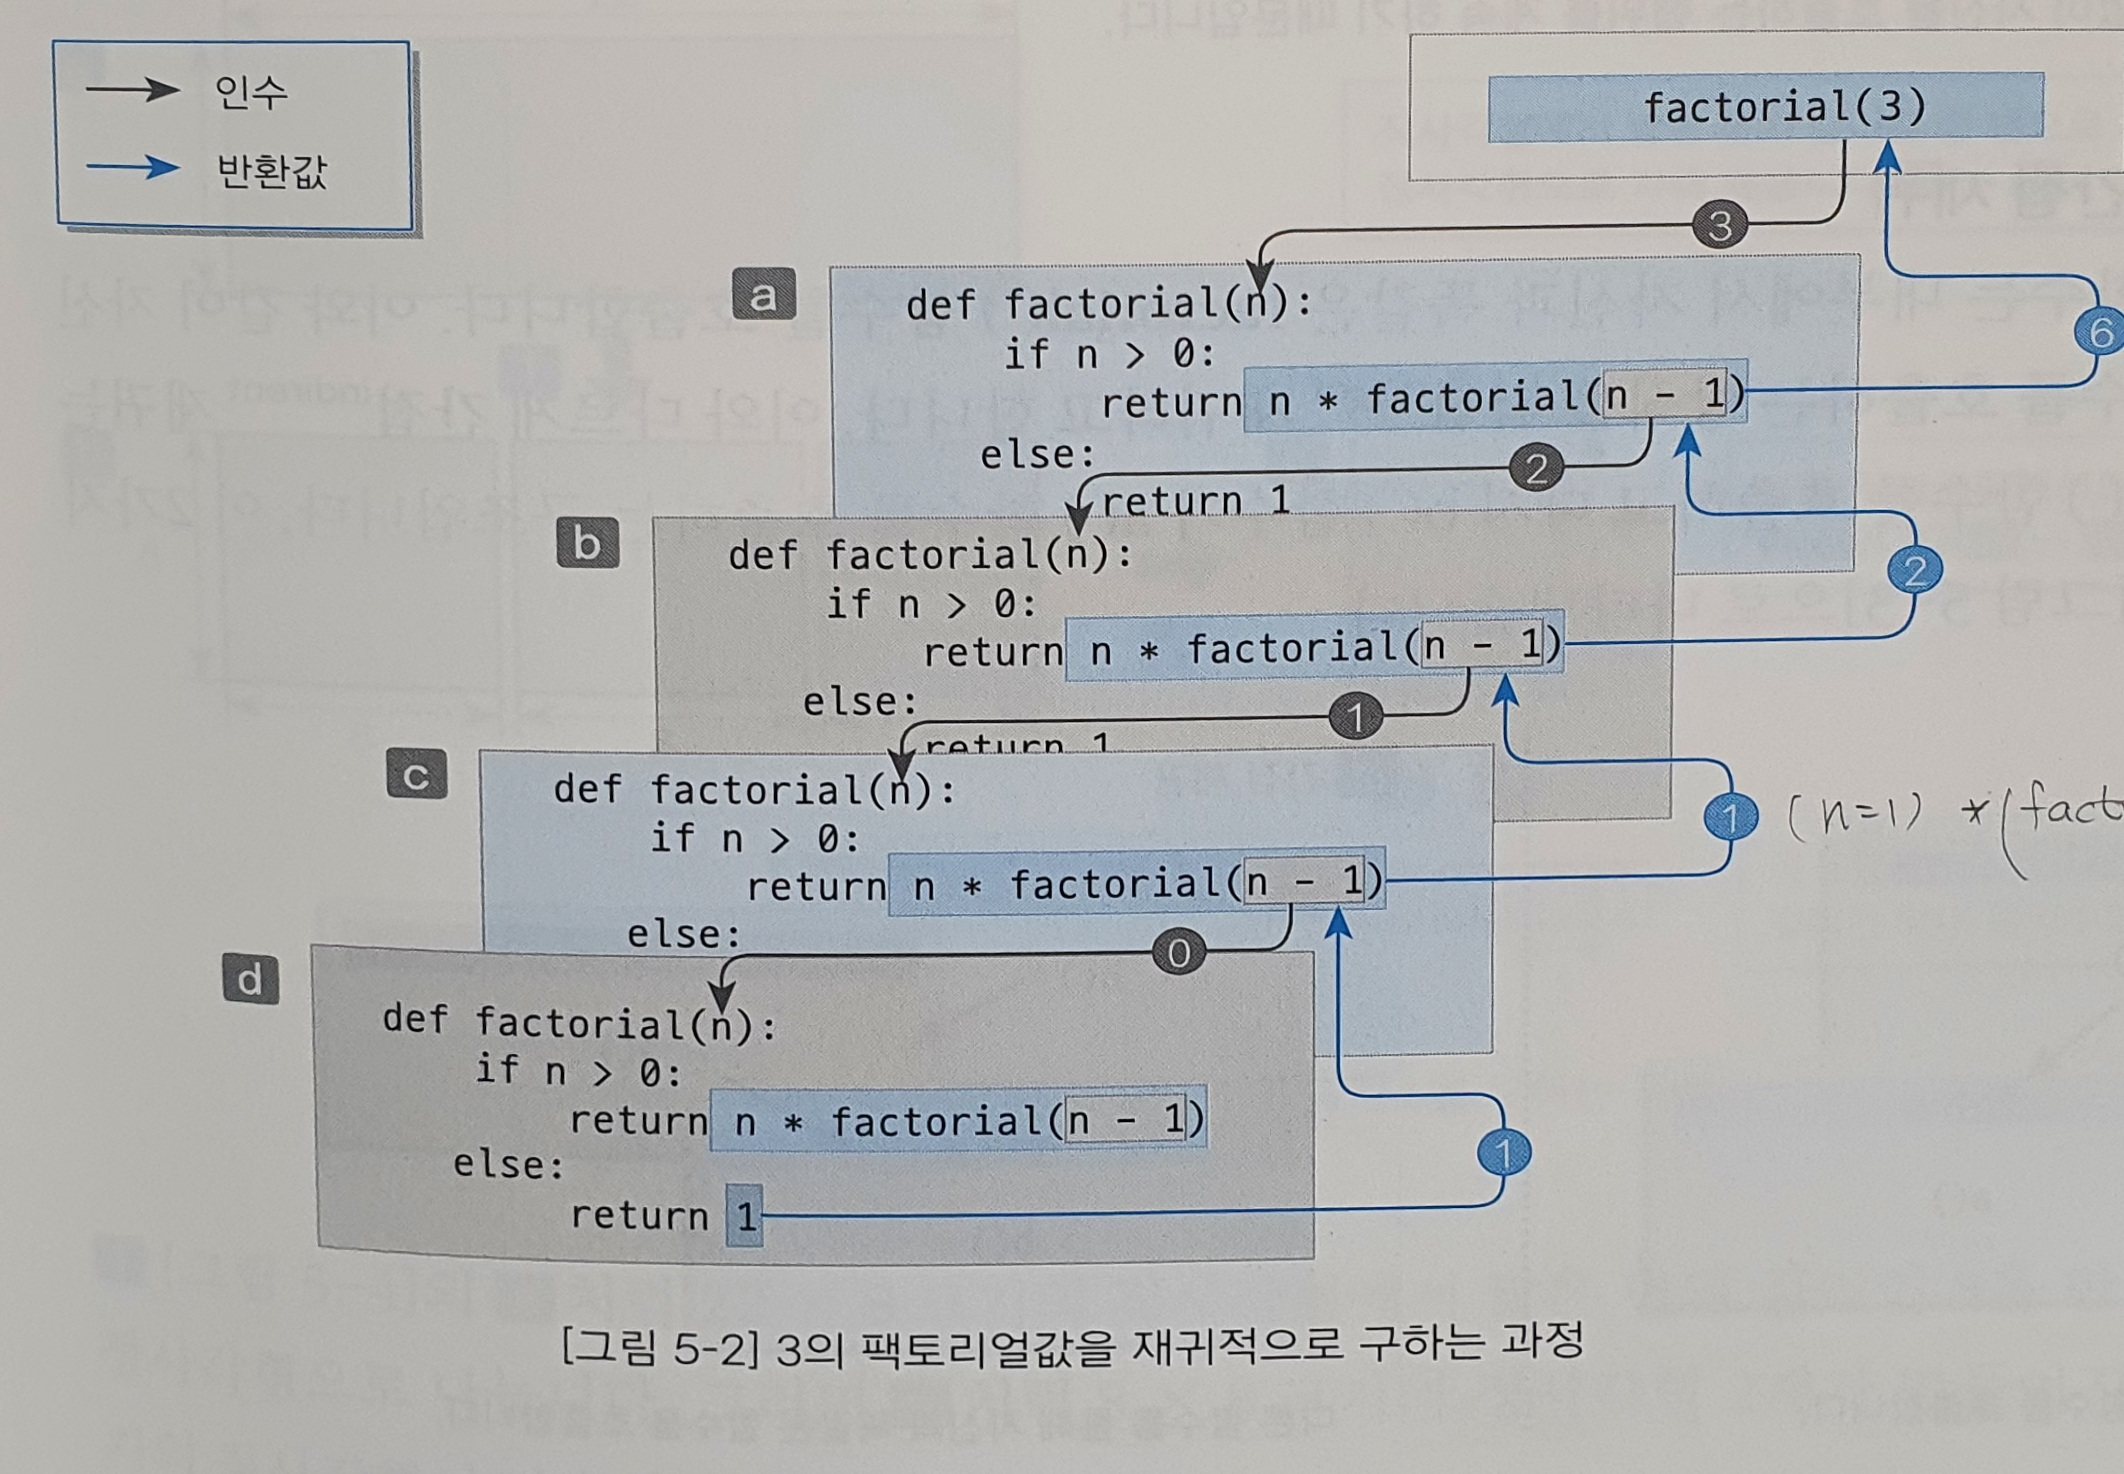


* [참고] if __name__ == "__main__":

    __name__는 현재 모듈의 이름을 담고있는 내장 변수이다. 이 변수는 직접 실행된 모듈의 경우 __main__이라는 값을 가지게 되며, 직접 실행되지 않은 import된 모듈은 모듈의 이름(파일명)을 가지게 된다.

https://medium.com/@chullino/if-name-main-%EC%9D%80-%EC%99%9C-%ED%95%84%EC%9A%94%ED%95%A0%EA%B9%8C-bc48cba7f720


    * math.factorial() 함수: x가 정수가 아니거나 음수라면 ValueError 예외처리를 보냄  
    

In [4]:
# [보충수업 5-1] 양의 정수인 팩토리얼 구하기(n이 음수면 ValueError 예외 처리 발생)

def factorial(n : int) -> int:
    """양의 정수 n의 팩토리얼값을 재귀적으로 구함(n이 음수면 ValueError 예외 처리 발생)"""
    if n > 0:
        return n * factorial(n - 1)
    elif n == 0:
        return 1
    else:
        raise ValueError

if __name__ == '__main__':
    n = int(input('출력할 팩토리얼 값을 입력하세요.: '))
    try:
        print(f'{n}의 팩토리얼은 {factorial(n)}입니다.')
    except ValueError:
        print(f'{n}의 팩토리얼은 구할 수 없습니다.')

출력할 팩토리얼 값을 입력하세요.: -5
-5의 팩토리얼은 구할 수 없습니다.


    * 직접 재귀호출(direct recursive call): 값을 구하기 위해 다시 `자기 자신과 똑같은` 함수를 호출
    
    * 간접 재귀호출(indirect recursive call): 함수 a()가 함수 b()를 호출하고 다시 함수 b()가 함수 a()를 호출하는 구조

### * 유클리드 호제법
    - 두 정숫값의 최대 공약수(GCD)를 재귀적으로 구하기
    - y가 0이 이면    ...x
    - y가 0이 아니면  ...gcd(y, x%y)
    
    
    * 구하는 방법: 2개의 정수값을 직사각형 두 변의 길이라고 생각하고 직사각형 안을 여러 개로 가득 채워나감
     -> 이렇게 만들 수 있는 가장 작은 정사각형의 변의 길이 구하기

In [6]:
# [ 유클리드 호제법으로 최대 공약수 구하기 ]

def gcd(x:int, y:int)->int:
    '''정숫값 x와 y의 최대 공약수를 반환'''
    if y == 0:
        return x
    else:
        return gcd(y, x%y)
    
if __name__ == '__main__':
    print('두 정숫값이 최대 공약수를 구합니다.')
    x = int(input('첫 번째 정숫값을 입력하세요: '))
    y = int(input('두 번째 정숫값을 입력하세요: '))
    
    print(f'두 정숫값의 최대 공약수는 {gcd(x, y)} 입니다.')

두 정숫값이 최대 공약수를 구합니다.
첫 번째 정숫값을 입력하세요: 34
두 번째 정숫값을 입력하세요: 28
두 정숫값의 최대 공약수는 2 입니다.


 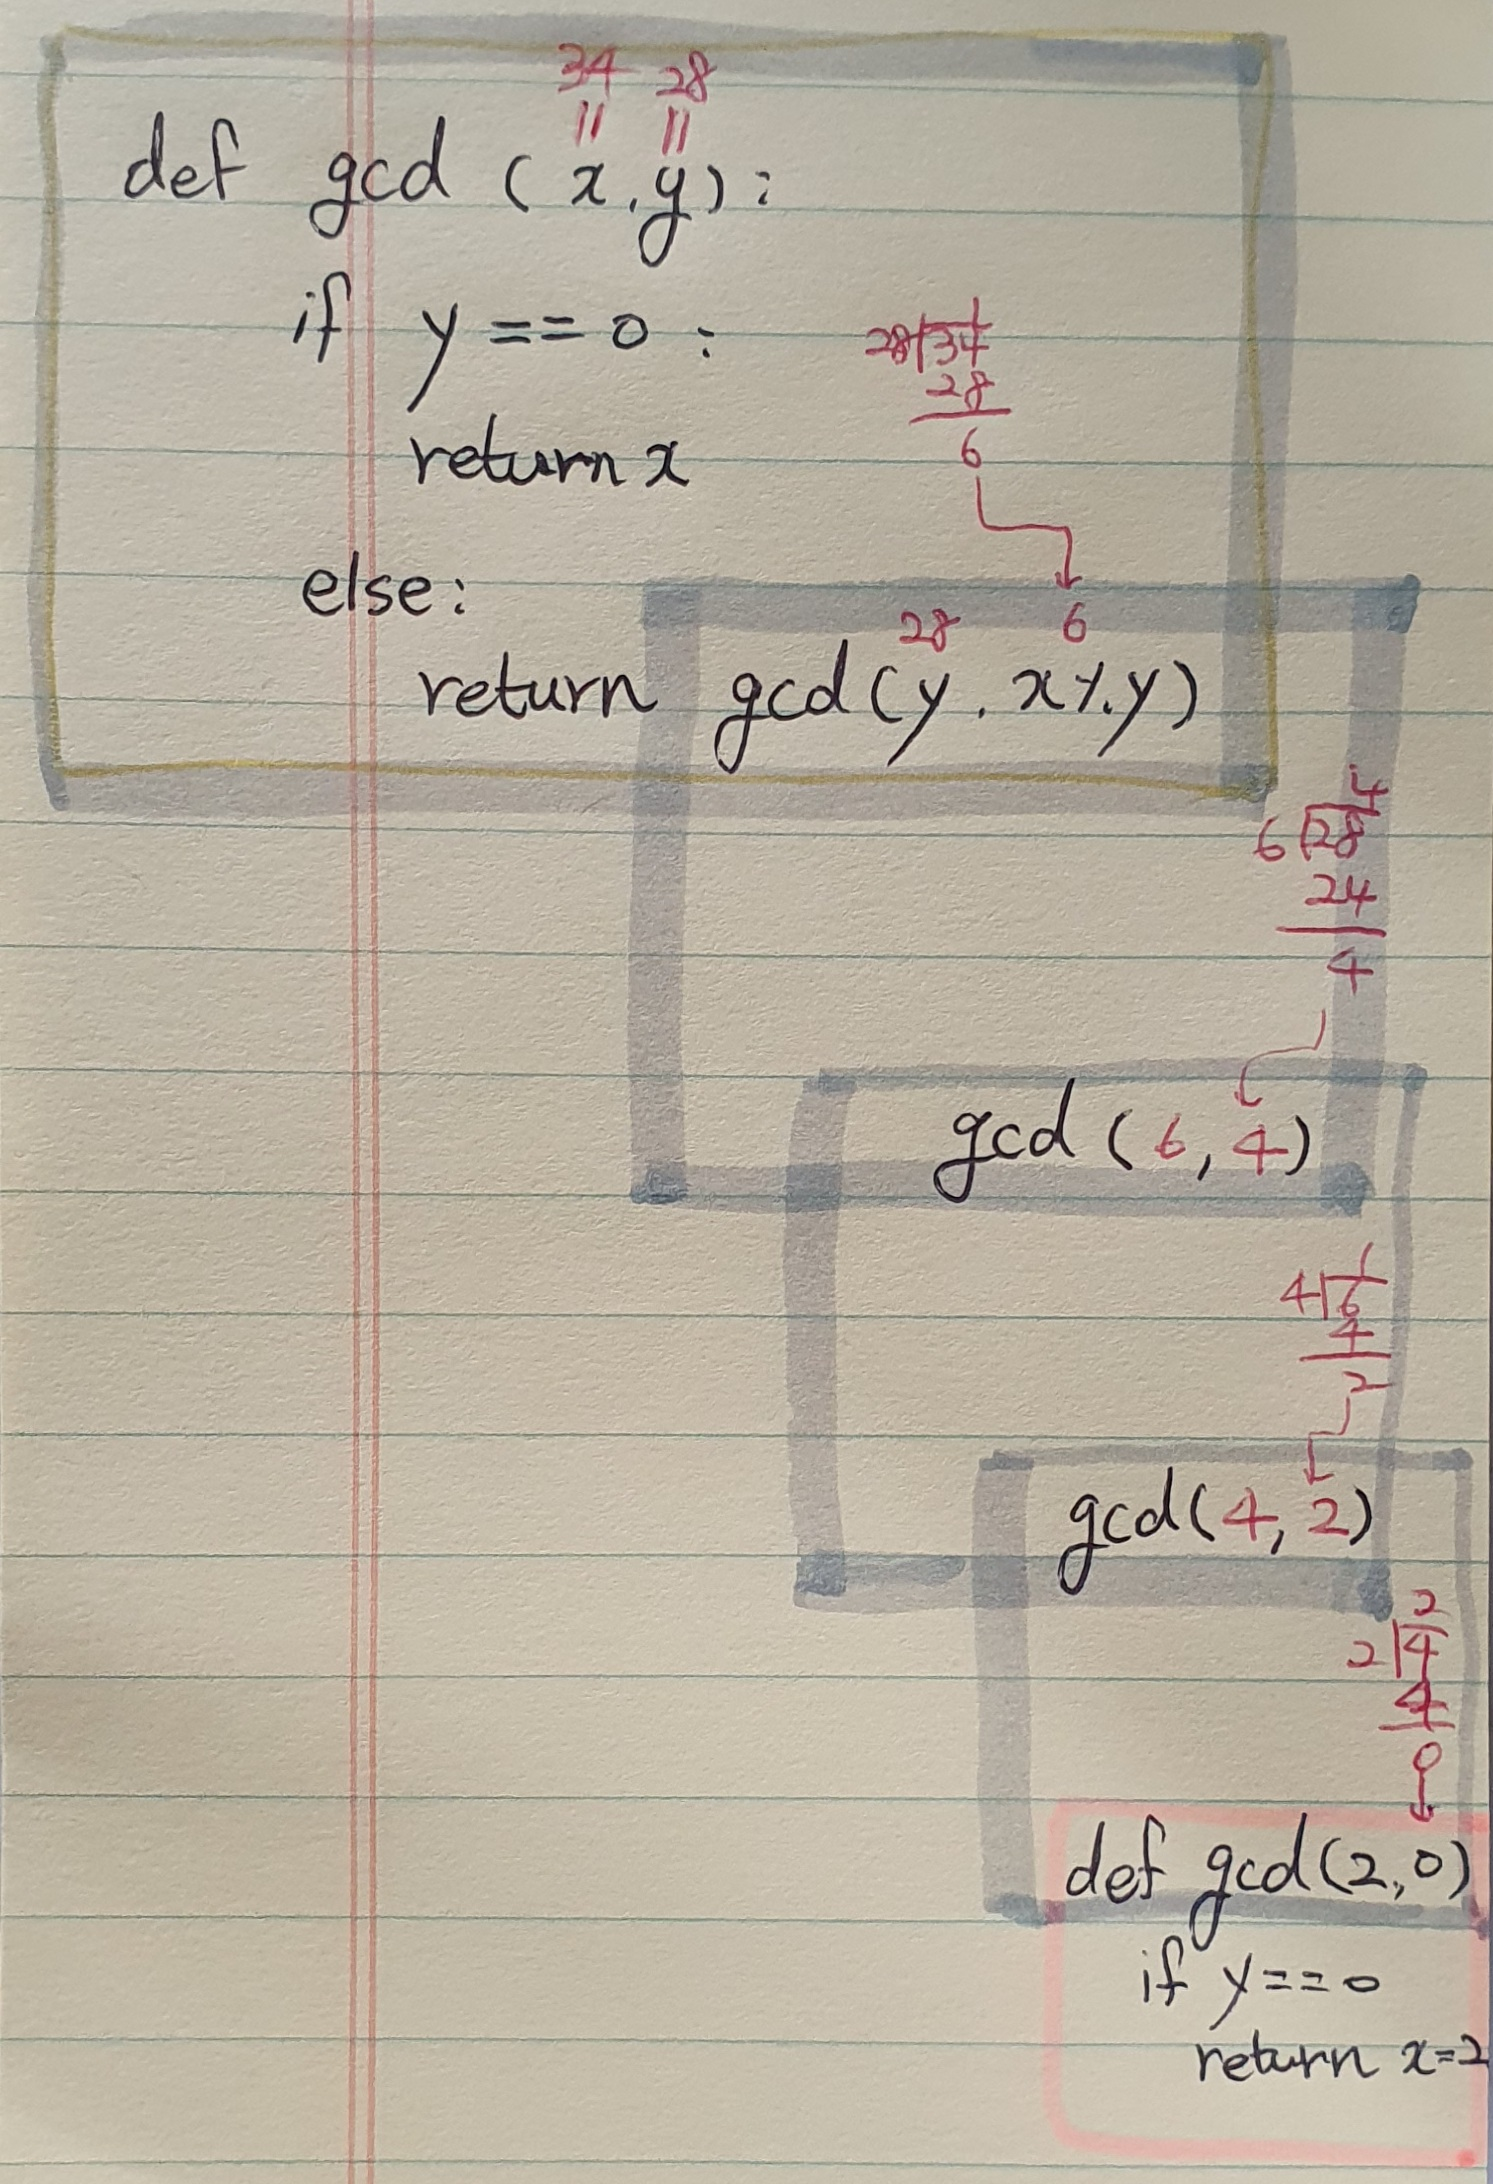
 
     * math.gcd( ) 함수

---


## (2) 재귀 알고리즘 분석

### * 2가지 분석방법: 하향식 분석 / 상향식 분석

In [7]:
# [ 순수한 재귀 함수 구현하기 ]

def recur(n:int) -> int:
    if n > 0:
        recur(n-1)
        print(n)
        recur(n-2)
        
x = int(input('정숫값을 입력하세요: '))

recur(x)

정숫값을 입력하세요: 4
1
2
3
1
4
1
2


    * recur() 함수는 함수 안에서 재귀 호출을 2번 실행
      - 전달받은 값이 0 이하이면 아무 일도 하지 않음

#### -  하향식 분석
: 가장 위쪽에 위치한 상자의 함수 호출부터 시작하여 계단식으로 조사해 나가는 분석 방법

- 꼭대기부터 분석하면 같은 함수를 여러번 호출 할 수 있으므로 반드시 효율적이라고 말할 수 없음. (아래 그림에서 recur(1), recur(2)를 여러번 호출)

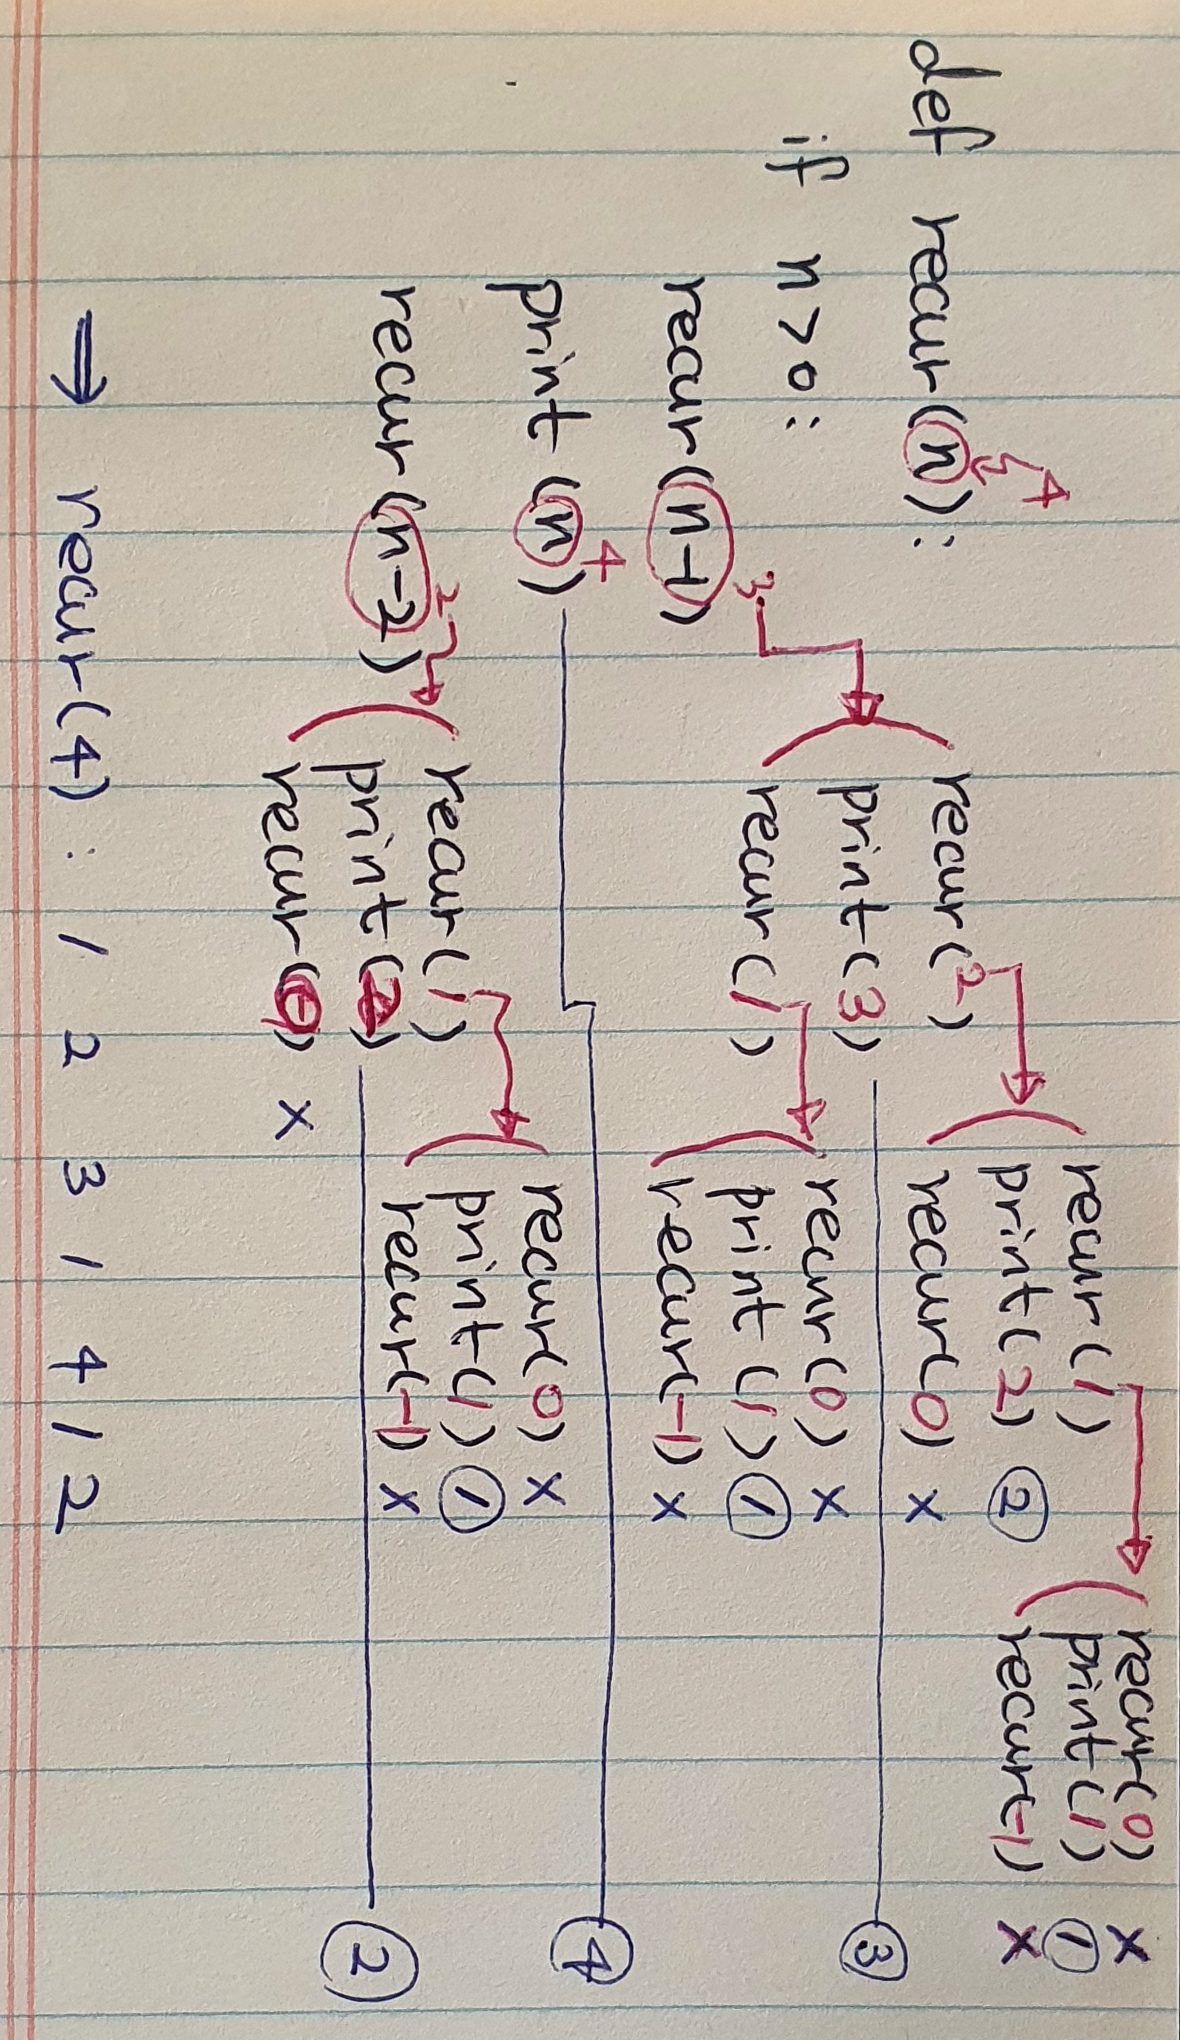


#### -  상향식 분석
: 아래쪽부터 쌓아 올리며 분석하는 방법

* recur() 함수는 n이 양수일때만 실행하므로 먼저 recur(1)부터 보자
    - recur(1)일때 recur(0)과 recur(-1)은 실행되지 않으므로 **`1`**만 출력
    - recur(2)는 `1`,**`2`**
    - recur(3)는 `1`,`2`,**`3`**,`1`
    - recur(4)는 `1`,`2`,`3`,`1`,**`4`**,`1`,`2`
